### 데이터 확인 작업

In [1]:
#기본 패키지 세팅 ~머신러닝까지 (복붙하고 시작하기)   ============================

import numpy as np #수치연산, 선형대수, ndarray라는 자료 구조를 가진 패키지
import pandas as pd #Series, DF 자료구조, 기술통계, 간단한 시각화를 가진 패키지
import seaborn as sns #샘플데이터와 시각화
import matplotlib.pyplot as plt #그래프 그리기 패키지
#그래프의 음수 사용을 위한 설정
plt.rcParams['axes.unicode_minus'] = False

#그래프 한글처리 패키지
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows': #윈도우즈라면
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin': #매킨토시(MacOS)라면
    rc('font', family='AppleGothic')

from sklearn import preprocessing #데이터 전처리 패키지
#sklearn : 데이터셋, 전처리, 머신러닝용 패키지

#지도 시각화 패키지
import folium

#수학 관련 패키지
import math

#### 파일 불러오기, 데이터 확인

In [2]:
# 캐글에서 다운로드 하면 3개의 파일이 압축되어 있다. 
# 메인이 되는 train을 불러와보자
train = pd.read_csv('C:/Users/admin/Downloads/titanic/train.csv')
train.info()

print(" ")

test = pd.read_csv('C:/Users/admin/Downloads/titanic/test.csv')
test.info()
#Survived가 없다. train으로 모델링해서 넣어줘야 하는구나!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

#### 기술 통계 확인

In [3]:
train[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### 결측치 확인

In [4]:
print(train.isna().sum())
#age에 177개. Cabin에 687개. embarked에 2개 결측치 확인

print("")

print(test.isna().sum())
#age의 86개 결측치. Fare1개. Cabin에 1개 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##### 결측치가 절반 이상이라면 삭제하기

In [5]:
train.dropna(thresh=(len(train)/2), axis=1, inplace=True)
train
# cabin이 삭제된걸 알 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### 타겟 변수를 찾아보자!

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 720x576 with 0 Axes>

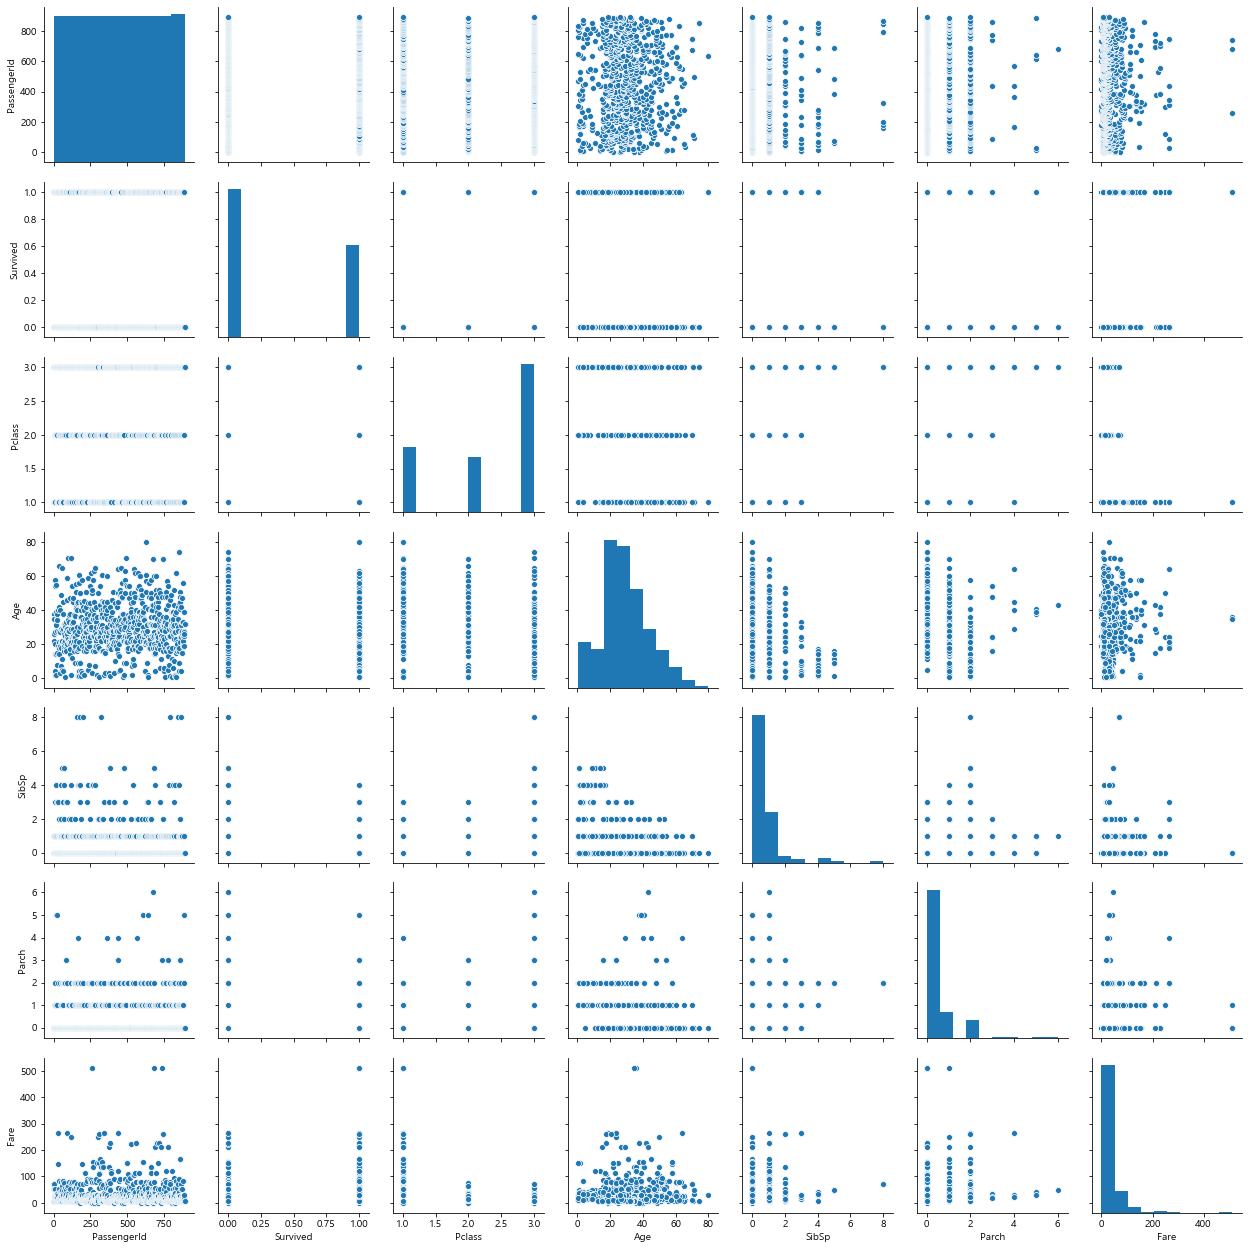

In [6]:
plt.figure(figsize=(10,8))
sns.pairplot(train)
plt.show()

#### Survived를 탐색적으로 알아보자

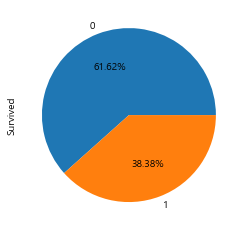

In [7]:
# 전체 생존율은 38.38%밖에 되지 않았다.
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

#### Pclass 변수 탐색

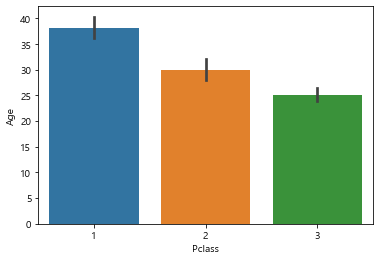

                   Age
Pclass Survived       
1      0         45.25
       1         35.00
2      0         30.50
       1         28.00
3      0         25.00
       1         22.00


In [9]:
sns.barplot(x='Pclass', y='Age', data=train)
plt.show()
#1등석의 나이가 가장 많고 3등석의 승객이 가장 젊었다.

pivot1 = pd.pivot_table(train, index=['Pclass','Survived'], values=['Age'], aggfunc='median')
print(pivot1)

